In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import jdcal

## Helper functions

In [3]:
def parse_date_jdcal(date_str):
    """
    Parse a date string in the format 'YYYY-MM-DD' or 'YYYY-MM' or 'YYYY' into a Julian Date.
    """
    # Check if the date is negative (BCE)
    negative_year = date_str.startswith('-')
    date_str_clean = date_str.lstrip('+-').rstrip('Z')
    date_part = date_str_clean.split('T')[0]

    # Handle dates with missing month or day
    parts = date_part.split('-')
    year = int(parts[0]) if len(parts) > 0 and parts[0] else 0
    month = int(parts[1]) if len(parts) > 1 and parts[1] else 1
    day = int(parts[2]) if len(parts) > 2 and parts[2] else 1

    # Adjust the year for BCE dates
    if negative_year:
        year = -year

    try:
        # Convert to Julian Date
        jd = sum(jdcal.gcal2jd(year, month, day))
        return jd
    except ValueError as e:
        print(f"Error converting date '{date_str}': {e}")
        return None

def calculate_age_in_years(row):
    if row['birthdate_jd'] is None or row['deathdate_jd'] is None:
        return None
    return (row['deathdate_jd'] - row['birthdate_jd']) / 365.2425


## Load data

In [4]:
# Load the data, 2.953.301 rows in 14s
data = pd.read_csv('born_and_died_slim.csv')
# rowcount
print(data.shape[0])

2953301


## Add age column and remove outliers

In [5]:
# remove rows with missing dates, 1m 6s
data = data.dropna(subset=['P569', 'P570'])
# convert P569 and P570 to datetime with parse_date function
data['birthdate_jd'] = data['P569'].apply(parse_date_jdcal)
data['deathdate_jd'] = data['P570'].apply(parse_date_jdcal)

# create age column
data['age'] = data.apply(calculate_age_in_years, axis=1)

# Identify outliers
age_outliers = data[(data['age'] <= 0) | (data['age'] >= 120)]

# Save outliers to a CSV file
age_outliers.to_csv('age_outliers.csv', index=False)

# remove outliers
data = data[data['age'] > 0]
data = data[data['age'] < 120]

# save data to a new csv file
data.to_csv('born_and_died_cleaned.csv', index=False)

## Age distribution

2903180


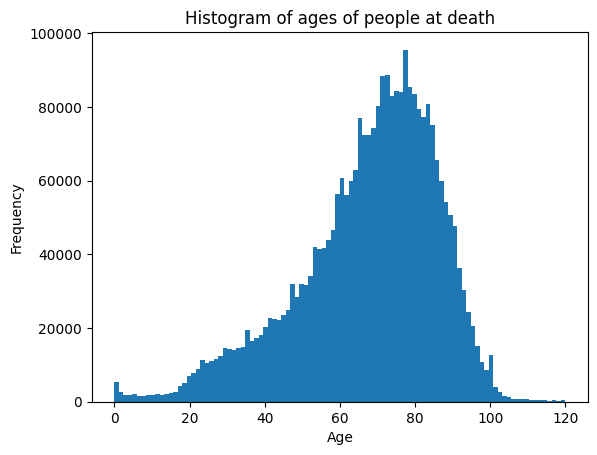

In [6]:
# cleanup done
print(data.shape[0])

# plot histogram
plt.hist(data['age'], bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of ages of people at death')
plt.show()
